#Problemas de la guía 5
## S. Schiavinato - LU 153/11

In [166]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (5 * (1 + np.sqrt(5)) / 2, 5)
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 20

Datos para ambos problemas

In [66]:
sigma = 0.3
X = np.array([2.00,2.10,2.20,2.30,2.40,2.50,2.60,2.70,2.80,2.90,3.00])
Y = np.array([2.78,3.29,3.29,3.33,3.23,3.69,3.46,3.87,3.62,3.40,3.99])

Ajustes por cuadrados mínimos

In [83]:
def cuadrados_minimos(X, Y):
    N = X.size
    Δ = N * np.sum(X**2) - np.sum(X)**2
    A1 = (np.sum(X**2) * np.sum(Y) - np.sum(X) * np.sum(X*Y))/Δ
    A2 = (N * np.sum(X*Y) - np.sum(X) * np.sum(Y))/Δ
    VarA1 = sigma**2 / Δ * np.sum(X**2)
    VarA2 = sigma**2/ Δ * N
    CovA1A2 = sigma**2/Δ * (-np.sum(X))
    a = np.array([A1, A2])
    cov = np.array([[VarA1, CovA1A2],[CovA1A2, VarA2]])
    return a, cov

##Problema 6 
### Graficar los datos y ajustar una recta, con las bandas de error (con y sin covarianza considerada)

Considerando la covarianza entera

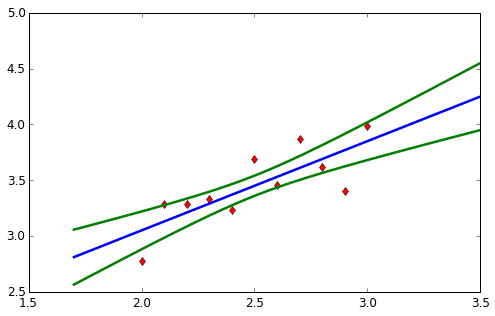

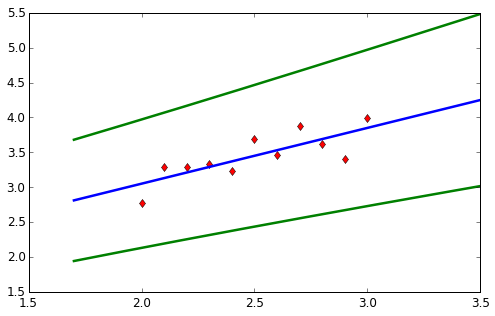

In [167]:
a, cov = cuadrados_minimos(X,Y)

t = np.linspace(1.7, 3.5, 1000)
f = lambda x: a[1] + a[0] * x
VarYB = lambda x : np.sqrt(cov[0,0] + x**2 * cov[1,1] + 2 * x * cov[0,1])
VarYM = lambda x : np.sqrt(cov[0,0] + x**2 * cov[1,1])

#Con covarianza
plt.figure(1)
plt.plot(X,Y,'rd')
plt.plot(t,f(t) + VarYB(t), 'g-')
plt.plot(t, f(t), 'b-')
plt.plot(t, f(t) - VarYB(t), 'g-');

#Sin covarianza
plt.figure(2)
plt.plot(X,Y,'rd')
plt.plot(t,f(t) + VarYM(t), 'g-')
plt.plot(t, f(t), 'b-')
plt.plot(t, f(t) - VarYM(t), 'g-');

##Problema 7
### A partir de las rectas ajustadas, generar números al azar respecto al ajuste con distribución normal.

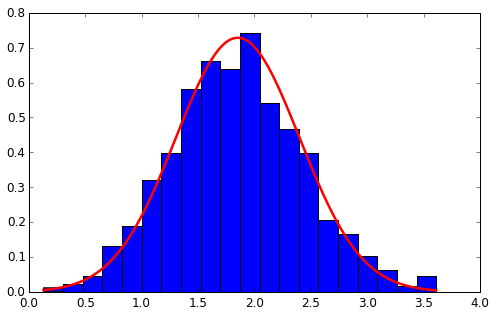

In [168]:
A = []
for i in range(1000):
    a, cov = cuadrados_minimos(X,Y)
    Yr = []
    i = 0
    for x in np.nditer(X):
        Yr.append(np.random.normal(a[0]*x+a[1], sigma, 1))
    Yr = np.ravel(np.array(Yr))
    ar, covr = cuadrados_minimos(X,Yr)
    f = lambda x: ar[0] * x + ar[1]
    A.append(f(0.5))
plt.hist(A, bins = 20, normed = True);
#plt.bar(bins[:-1], hist, width = np.diff(bins))
normal = lambda x, μ, σ : 1/(np.sqrt(2*np.pi)*σ) * np.exp(-1/2*(x - μ)**2 / σ**2)
t = np.linspace(np.amin(A), np.amax(A), 1000)
plt.plot(t, normal(t, a[0]*0.5+a[1], np.sqrt(sigma)), 'r-')